In [84]:
# !sudo apt-get install tesseract-ocr-all

%pip install pytesseract-ocr-all

ERROR: Could not find a version that satisfies the requirement pytesseract-ocr-all (from versions: none)
ERROR: No matching distribution found for pytesseract-ocr-all
Note: you may need to restart the kernel to use updated packages.


Digital
Image Processing

Concepts, Algorithms,
and Scientific Applications

Third Edition

Springer




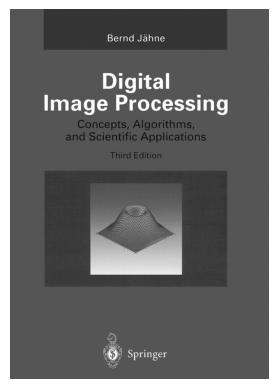

In [85]:
from matplotlib import pyplot as plt
import numpy as np
import pytesseract
from PIL import Image
import cv2

image = cv2.imread('book-cover.jpeg', cv2.IMREAD_GRAYSCALE)
text = pytesseract.image_to_string('book-cover.jpeg')

print(text)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

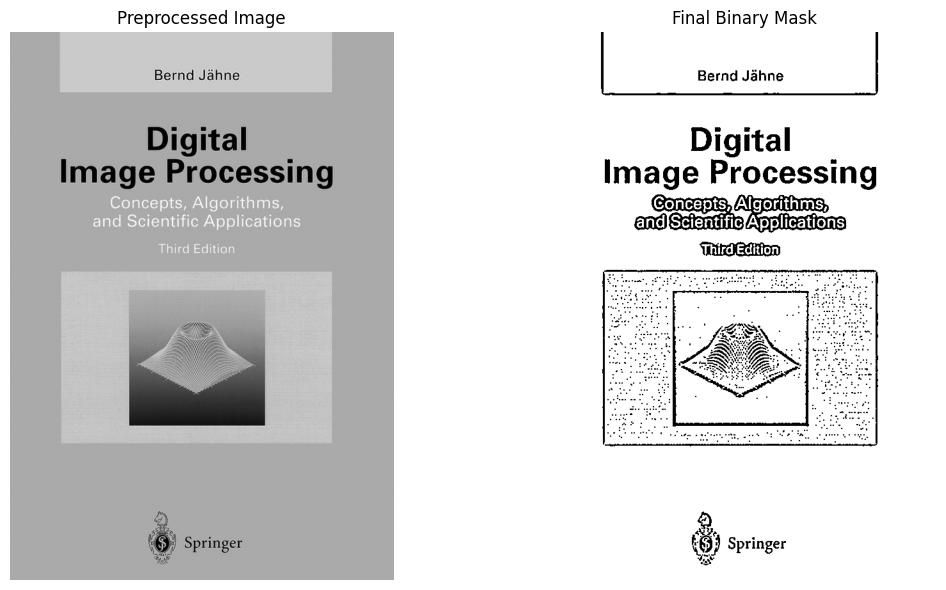

| Bernd Jahne |

Digital
Image Processing

eapeete, Aiea ms}
fand|ScientificyApplications)

arhird Eition)

a
6) Springer



In [86]:
import cv2
import matplotlib.pyplot as plt

# Φόρτωση εικόνας (γκρι)
image = cv2.imread('book-cover.jpeg', cv2.IMREAD_GRAYSCALE)

# Invert για καλύτερη επεξεργασία
inverted = cv2.bitwise_not(image)

# ΜΙΚΡΟ Blur για να μην χαθεί λεπτομέρεια (προαιρετικό)
blurred = cv2.GaussianBlur(inverted, (3, 3), 0)

# Adaptive Threshold για να προσαρμοστούμε τοπικά στον φωτισμό
adaptive = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

# Morphological Closing για να ενώσουμε σπασμένα γράμματα
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
closed = cv2.morphologyEx(adaptive, cv2.MORPH_CLOSE, kernel)

# Εμφάνιση αποτελέσματος
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Preprocessed Image')
plt.imshow(inverted, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Final Binary Mask')
plt.imshow(closed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print(pytesseract.image_to_string(closed))